## Miniproject 2: MovieLens Visualization



### Download data

In [ ]:
import requests

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv',
     'train.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/train.csv',
     'test.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/test.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')
download_file('train.csv')
download_file('test.csv')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
display(data)
display(movies)
display(train)
display(test)

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,166,346,1
4,298,474,4
...,...,...,...
89995,378,78,3
89996,880,476,3
89997,716,204,5
89998,276,1090,1


,User ID,Movie ID,Rating
0,707,766,3
1,943,188,4
2,772,313,5
3,828,26,3
4,854,514,4
...,...,...,...
9995,13,858,1
9996,7,79,4
9997,588,1058,2
9998,916,727,4


### Basic Visualizations

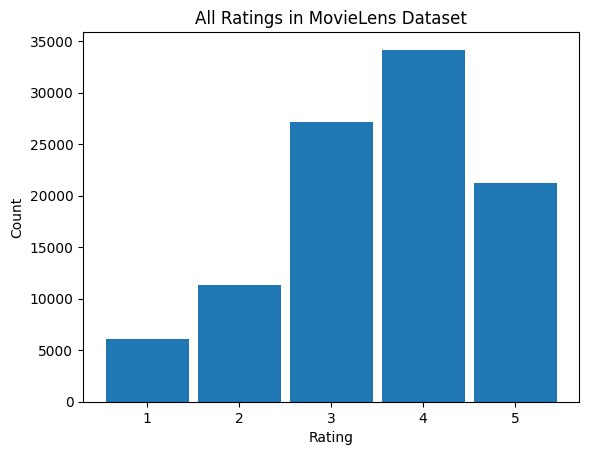

In [ ]:
plt.hist(data['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)

plt.title('All Ratings in MovieLens Dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

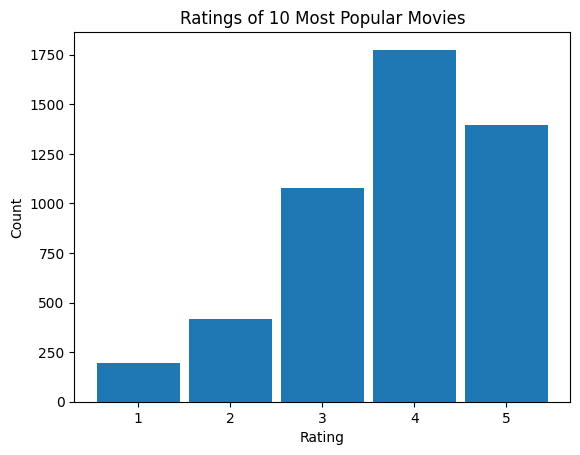

In [ ]:
top_ten_count = data['Movie ID'].value_counts().head(10).index.tolist()
most_popular = data[data['Movie ID'].isin(top_ten_count)]

plt.hist(most_popular['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)
plt.title('Ratings of 10 Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

,Rating
Movie ID,
814,5.0
1599,5.0
1201,5.0
1122,5.0
1653,5.0
1293,5.0
1500,5.0
1189,5.0
1536,5.0


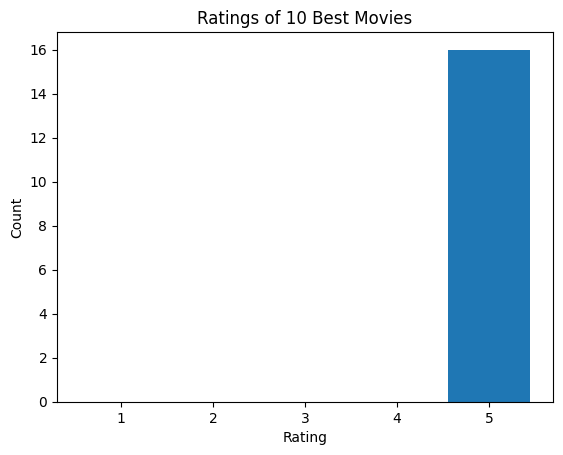

In [ ]:
top_ten_avg = data[['Movie ID', 'Rating']].groupby('Movie ID').mean().sort_values('Rating', ascending=False).head(10)
display(top_ten_avg)
best_movies = data[data['Movie ID'].isin(top_ten_avg.index.tolist())]

plt.hist(best_movies['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)
plt.title('Ratings of 10 Best Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

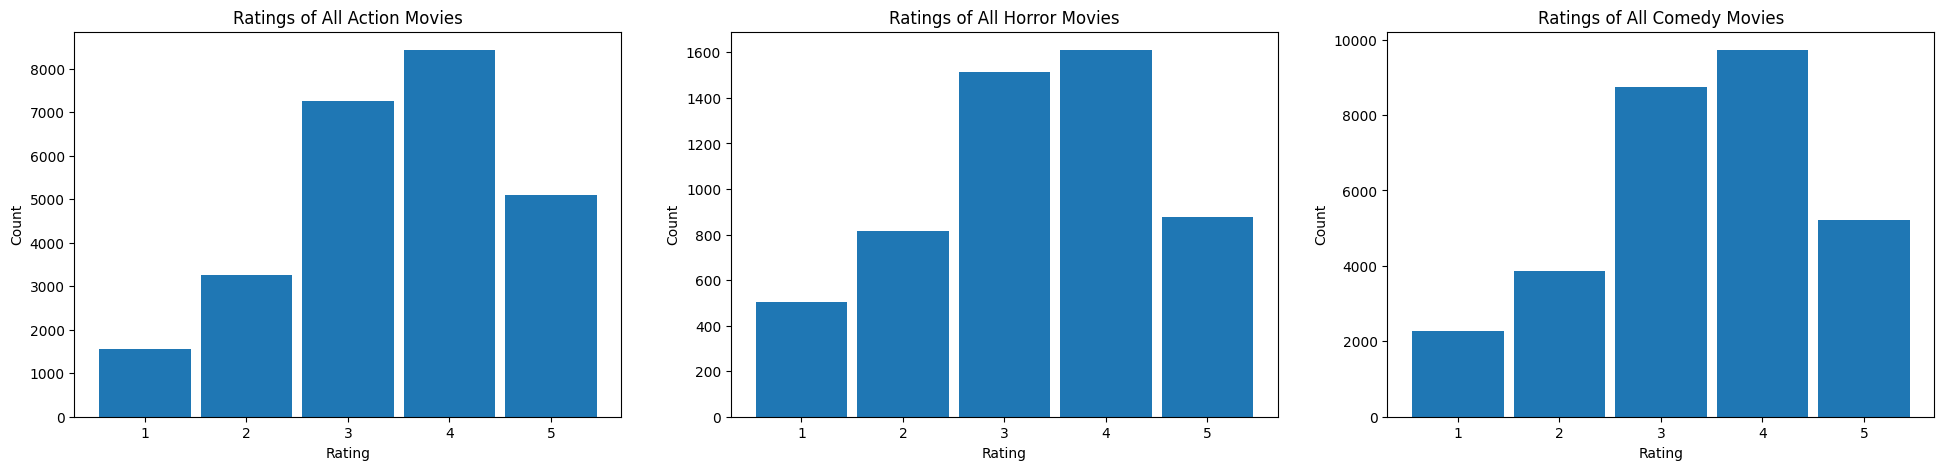

In [ ]:
action_ids = movies[movies['Action']==1]['Movie ID'].tolist()
action_movies = data[data['Movie ID'].isin(action_ids)]

horror_ids = movies[movies['Horror']==1]['Movie ID'].tolist()
horror_movies = data[data['Movie ID'].isin(horror_ids)]

comedy_ids = movies[movies['Comedy']==1]['Movie ID'].tolist()
comedy_movies = data[data['Movie ID'].isin(comedy_ids)]

plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
plt.hist(action_movies['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)
plt.title('Ratings of All Action Movies')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(horror_movies['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)
plt.title('Ratings of All Horror Movies')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(comedy_movies['Rating'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.9)
plt.title('Ratings of All Comedy Movies')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()